In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm
import multiprocessing
from data.read_data import *

number of students: (136939,)


In [2]:
students = get_Students()

In [3]:
# Function to sort the given array using the patience sorting
def patienceSorting(df):
    sorted_df = df.sort_values(by=df.columns[0])

    piles = []

    for i in tqdm(range(sorted_df.shape[0])):
        if not piles:
            temp = [sorted_df.iloc[i]] 
            piles.append(temp)
        else:
            flag = True

            # Traverse all the piles
            for j in range(len(piles)):
                # Check if the element to be inserted is less than
                # current pile's top
                if sorted_df.iloc[i,1] < piles[j][-1][1]:
                    piles[j].append(sorted_df.iloc[i])

                    # Update flag
                    flag = False
                    break

            # If flag is True
            if flag:
                # Create a new pile
                temp = []

                # Insert current element into temp
                temp.append(sorted_df.iloc[i])

                # Insert current pile into all the piles
                piles.append(temp)


    return piles

In [4]:
piles = patienceSorting(students)
piles

100%|██████████| 136939/136939 [40:38<00:00, 56.16it/s]   


[[0    232.00
  1     73.62
  Name: 99354, dtype: float64,
  0    273.00
  1     72.95
  Name: 33502, dtype: float64,
  0    281.00
  1     70.14
  Name: 101457, dtype: float64,
  0    314.00
  1     64.83
  Name: 112876, dtype: float64,
  0    330.00
  1     64.73
  Name: 33681, dtype: float64,
  0    334.00
  1     64.09
  Name: 86951, dtype: float64,
  0    346.00
  1     57.21
  Name: 52735, dtype: float64,
  0    427.00
  1     56.95
  Name: 69601, dtype: float64],
 [0    243.00
  1     83.15
  Name: 114362, dtype: float64,
  0    245.00
  1     77.41
  Name: 30426, dtype: float64,
  0    287.00
  1     73.52
  Name: 66177, dtype: float64,
  0    313.00
  1     72.68
  Name: 13977, dtype: float64,
  0    314.00
  1     70.45
  Name: 51919, dtype: float64,
  0    321.00
  1     67.74
  Name: 120841, dtype: float64,
  0    326.0
  1     66.0
  Name: 107099, dtype: float64,
  0    347.00
  1     64.24
  Name: 70536, dtype: float64,
  0    361.00
  1     62.75
  Name: 35709, dtype: fl

In [10]:
import seaborn as sns

def plot_scatter_piles(piles):
    # Create an empty DataFrame to store all points
    df_all = pd.DataFrame(columns=['SAT', 'Bagrut', 'Pile'])

    # Iterate over each pile and add points to the DataFrame
    for i, pile in enumerate(piles):
        pile_df = pd.DataFrame(pile, columns=['SAT', 'Bagrut'])
        pile_df['Pile'] = f'Pile {i+1}'
        df_all = pd.concat([df_all, pile_df], ignore_index=True)

    # Create scatter plot using Seaborn
    sns.scatterplot(data=df_all, x='SAT', y='Bagrut', hue='Pile', palette='deep', markers=True, s=7)
    plt.xlabel('SAT')
    plt.ylabel('Bagrut')
    plt.title('Scatter Plot of Piles')
    plt.legend(title='Pile')
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
piles = patienceSorting(df)
plot_scatter_piles(piles)


SAT Bagrut       Pile
0       NaN    NaN     Pile 1
1       NaN    NaN     Pile 1
2       NaN    NaN     Pile 1
3       NaN    NaN     Pile 1
4       NaN    NaN     Pile 1
...     ...    ...        ...
136934  NaN    NaN  Pile 1111
136935  NaN    NaN  Pile 1111
136936  NaN    NaN  Pile 1111
136937  NaN    NaN  Pile 1112
136938  NaN    NaN  Pile 1112

[136939 rows x 3 columns]

In [5]:
def plot_piles(piles, filename, title):
    lists_lengths = [len(sublist) for sublist in piles]
    list_indices = range(len(piles))
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a bar plot
    ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')
    
    # Create a line plot
    ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')
    
    # Set x-axis ticks to match list indices
    ax.set_xticks(list_indices)
    
    # Set labels and title
    ax.set_xticks(range(0, len(piles), 100))
    ax.set_xlabel('Pile Number')
    ax.set_ylabel('Length of Piles')
    ax.set_title('Patient Sort Algorithm - ' + title )
    ax.grid(False)
    plt.savefig("plots/png/PS_"+ filename +".png") # save as png
    plt.savefig("plots/pdf/PS_"+ filename +".pdf") # save as pdf
    
    plt.show()

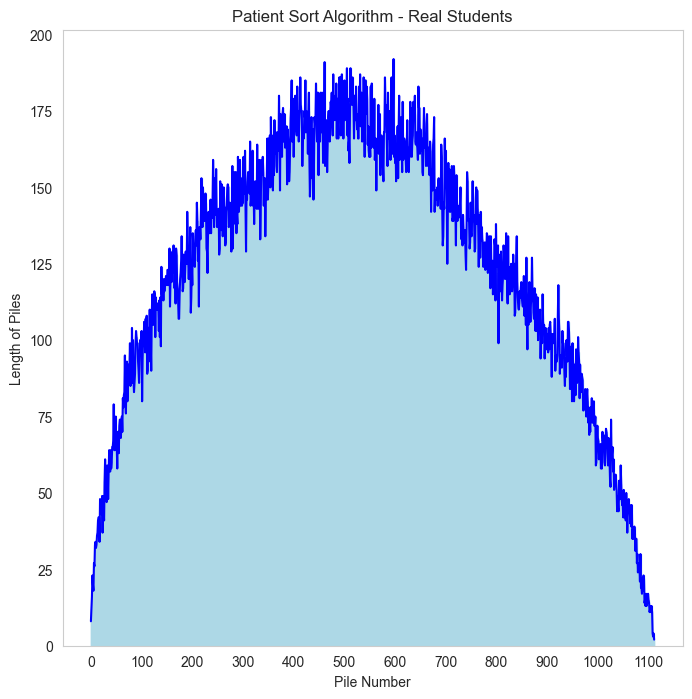

In [7]:
plot_piles(piles, "real_students", "Real Students")

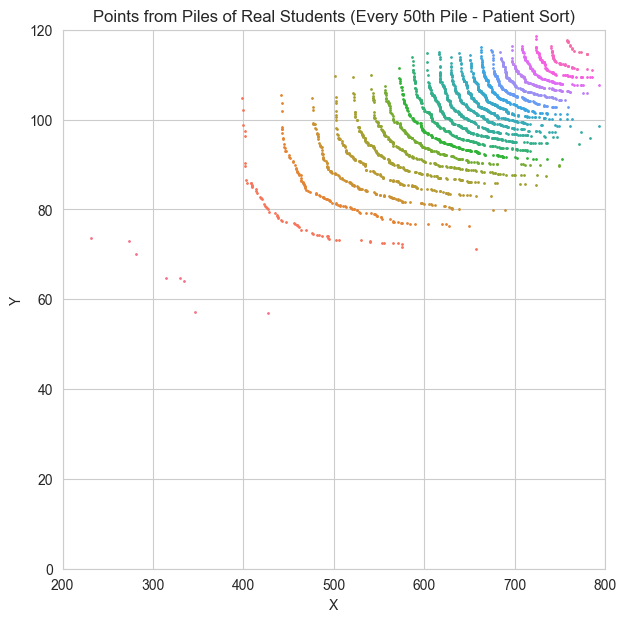

In [6]:
palette = sns.color_palette("husl", len(piles) // 50 +1)
plt.figure(figsize=(7, 7))
plt.xlim(200, 800)
plt.ylim(0, 120)

# Iterate through the pile of real students and select points from every 50th pile

for i, pile in enumerate(piles[::50]):
    # Get the color for the current pile from the palette
    color = palette[i]
    
    # Iterate through the dataframes in the current pile and plot their points
    for df in pile:
        # Plot the points from the current dataframe
        plt.scatter(df[0], df[1], color=color, s=1)
        

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points from Piles of Real Students (Every 50th Pile - Patient Sort)')

plt.savefig("plots/png/PS_piles_distribution.png") # save as png
plt.savefig("plots/pdf/PS_piles_distribution.pdf") # save as pdf

# Show plot
plt.show()